In [10]:
# Import necessary libraries
import requests  # Allows sending HTTP requests to interact with web services and APIs.
import pandas as pd  # A powerful data manipulation and analysis library.
import numpy as np  # A fundamental package for scientific computing with Python.
from pandas import DataFrame  # Specific import for creating and manipulating dataframes.
from io import StringIO  # Allows the use of string buffer objects as files.
import time  # Provides time-related functions.
import json  # Allows working with JSON data (parsing and serialization).
from datetime import date  # Provides functions to manipulate dates.
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Functions for time series analysis.
from statsmodels.tsa.arima_model import ARIMA  # ARIMA model for time series forecasting.
from statsmodels.tsa.seasonal import seasonal_decompose  # Function to decompose time series into components.
from sklearn.metrics import mean_squared_error  # Function to calculate mean squared error for model evaluation.
import matplotlib.pylab as plt  # Matplotlib's PyLab interface for plotting.
%matplotlib inline  # Jupyter Notebook magic function to display plots inline within the notebook.
from matplotlib.pylab import rcParams  # Matplotlib configuration parameters.
rcParams['figure.figsize'] = 15, 6  # Sets the default size of the plots to be 15x6 inches.


UsageError: unrecognized arguments: # Jupyter Notebook magic function to display plots inline within the notebook.


In [11]:
df_fx_data=pd.read_csv('Datasets/BOE-XUDLERD.csv')
df_fx_data

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


In [18]:
#Add the new column
df_fx_data['id'] = 0

In [19]:
new_column_values = [i for i in range(len(df_fx_data))]
df_fx_data['id'] = new_column_values

In [20]:
print("Columns after addition:", df_fx_data.columns)

Columns after addition: Index(['Date', 'Value', 'id'], dtype='object')


In [21]:
df_fx_data

,Date,Value,id
0,2017-11-09,0.8603,0
1,2017-11-08,0.8631,1
2,2017-11-07,0.8639,2
3,2017-11-06,0.8631,3
4,2017-11-03,0.8608,4
...,...,...,...
10832,1975-01-08,0.7554,10832
10833,1975-01-07,0.7510,10833
10834,1975-01-06,0.7524,10834
10835,1975-01-03,0.7585,10835


In [22]:
# Remove the 'UnwantedColumn'
df_fx_data.drop('id', axis=1, inplace=True)

# Display the DataFrame columns after removal
print("Columns after removal:", df_fx_data.columns)

Columns after removal: Index(['Date', 'Value'], dtype='object')


In [24]:
df_fx_data

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


In [14]:
df_fx_data['Date']=pd.to_datetime(df_fx_data['Date'])
indexed_df=df_fx_data.set_index('Date')
print(indexed_df)
ts=indexed_df['Value']
ts.head(5)

             Value
Date              
2017-11-09  0.8603
2017-11-08  0.8631
2017-11-07  0.8639
2017-11-06  0.8631
2017-11-03  0.8608
...            ...
1975-01-08  0.7554
1975-01-07  0.7510
1975-01-06  0.7524
1975-01-03  0.7585
1975-01-02  0.7633

[10837 rows x 1 columns]


Date
2017-11-09    0.8603
2017-11-08    0.8631
2017-11-07    0.8639
2017-11-06    0.8631
2017-11-03    0.8608
Name: Value, dtype: float64

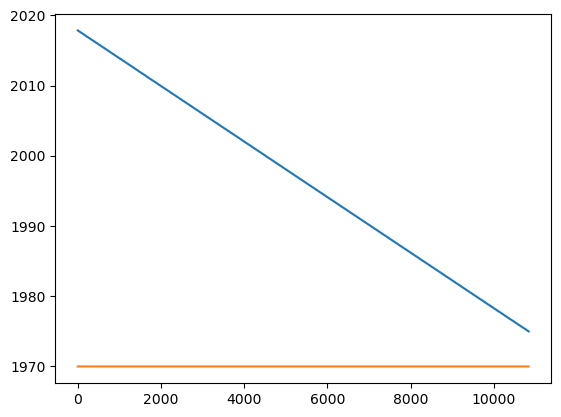

In [15]:
plt.plot(df_fx_data)

In [16]:
ts

Date
2017-11-09    0.8603
2017-11-08    0.8631
2017-11-07    0.8639
2017-11-06    0.8631
2017-11-03    0.8608
               ...  
1975-01-08    0.7554
1975-01-07    0.7510
1975-01-06    0.7524
1975-01-03    0.7585
1975-01-02    0.7633
Name: Value, Length: 10837, dtype: float64

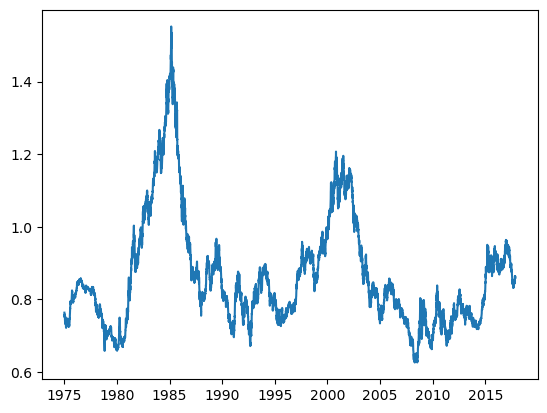

In [17]:
plt.plot(ts)

In [27]:
ts_week=ts.resample('W').mean()
print(ts_week)

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
               ...   
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, Length: 2237, dtype: float64


In [28]:
ts_week_log=np.log(ts_week)
print(ts_week)

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
               ...   
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, Length: 2237, dtype: float64


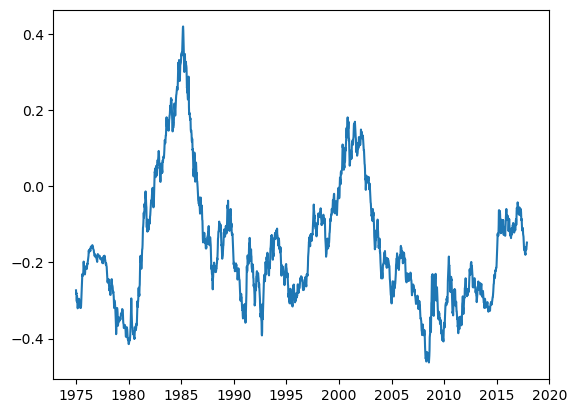

In [29]:
plt.plot(ts_week_log)

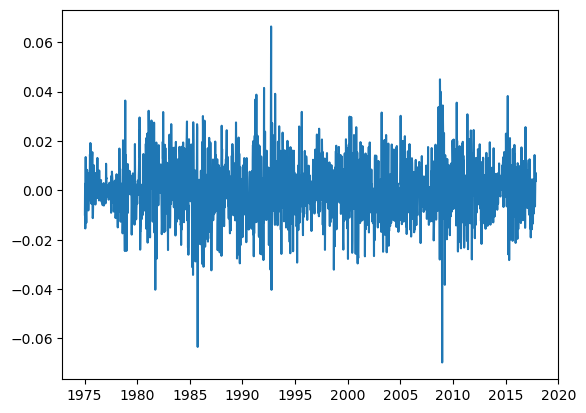

In [30]:
ts_week_log_diff=ts_week_log-ts_week_log.shift()
plt.plot(ts_week_log_diff)